According to various research, the average global temperature has been rising over the last century. An increase in the global temperature that doesn't stop would have disastrous effects. There will be an impact on billions of people due to rising sea levels and an increase in the frequency of severe weather occurrences. 

Question 1: Could it be that certain airborne gases are causing the environment to get overheated?

Question 2: If so, which gas? What is the relationship between the gases and the heat that is trapped and causes the temperature to rise?

In [ ]:
# Importing the needed Python libraries
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime
import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import io
import tensorflow as tf
from scipy import stats
from tensorflow import keras
plt.style.use('bmh')

In [ ]:
# Mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Colab"

/content/drive/My Drive/Colab


In [ ]:
!ls

 AB_NYC_2019.csv      Practice_file_week_3.ipynb  'Wetland Data-1.csv'
 climate_Change.csv   total_cases.csv		   World_GDP.csv


In [ ]:
# Reading Climate Change Data
tols=pd.read_csv("climate_Change.csv")
print(tols.to_string())

     Year  Month    MEI  CarbonDiOxide  Methane  NitrogenOxide  TriChloroFluoroMethane  DiChloroDiFluoroMethane        TSI  Aerosols  Temperature
0    1983      5  2.556         345.96  1638.59        303.677                 191.324                  350.113  1366.1024    0.0863        0.109
1    1983      6  2.167         345.52  1633.71        303.746                 192.057                  351.848  1366.1208    0.0794        0.118
2    1983      7  1.741         344.15  1633.22        303.795                 192.818                  353.725  1366.2850    0.0731        0.137
3    1983      8  1.130         342.25  1631.35        303.839                 193.602                  355.633  1366.4202    0.0673        0.176
4    1983      9  0.428         340.17  1648.40        303.901                 194.392                  357.465  1366.2335    0.0619        0.149
5    1983     10  0.002         340.30  1663.79        303.970                 195.171                  359.174  1366.0589  

In [ ]:
# Display information about the DataFrame
tols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     308 non-null    int64  
 1   Month                    308 non-null    int64  
 2   MEI                      308 non-null    float64
 3   CarbonDiOxide            308 non-null    float64
 4   Methane                  308 non-null    float64
 5   NitrogenOxide            308 non-null    float64
 6   TriChloroFluoroMethane   308 non-null    float64
 7   DiChloroDiFluoroMethane  308 non-null    float64
 8   TSI                      308 non-null    float64
 9   Aerosols                 308 non-null    float64
 10  Temperature              308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


Checking the null values


In [ ]:
tols.isnull().sum()

Year                       0
Month                      0
MEI                        0
CarbonDiOxide              0
Methane                    0
NitrogenOxide              0
TriChloroFluoroMethane     0
DiChloroDiFluoroMethane    0
TSI                        0
Aerosols                   0
Temperature                0
dtype: int64

In [ ]:
tols.isnull()

,Year,Month,MEI,CarbonDiOxide,Methane,NitrogenOxide,TriChloroFluoroMethane,DiChloroDiFluoroMethane,TSI,Aerosols,Temperature
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
303,False,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False


# **EXPLORATORY DATA ANALYSIS**

# Checking the output variable's temperature distribution


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


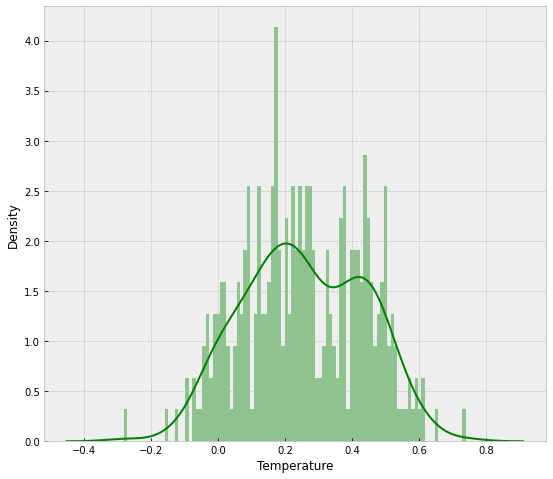

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(tols['Temperature'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#Let's plot all the features to examine their distribution.
tols_num = tols.select_dtypes(include = ['float64', 'int64'])
tols_num.head()

,Year,Month,MEI,CarbonDiOxide,Methane,NitrogenOxide,TriChloroFluoroMethane,DiChloroDiFluoroMethane,TSI,Aerosols,Temperature
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4837d26b20>,
      dtype=object)

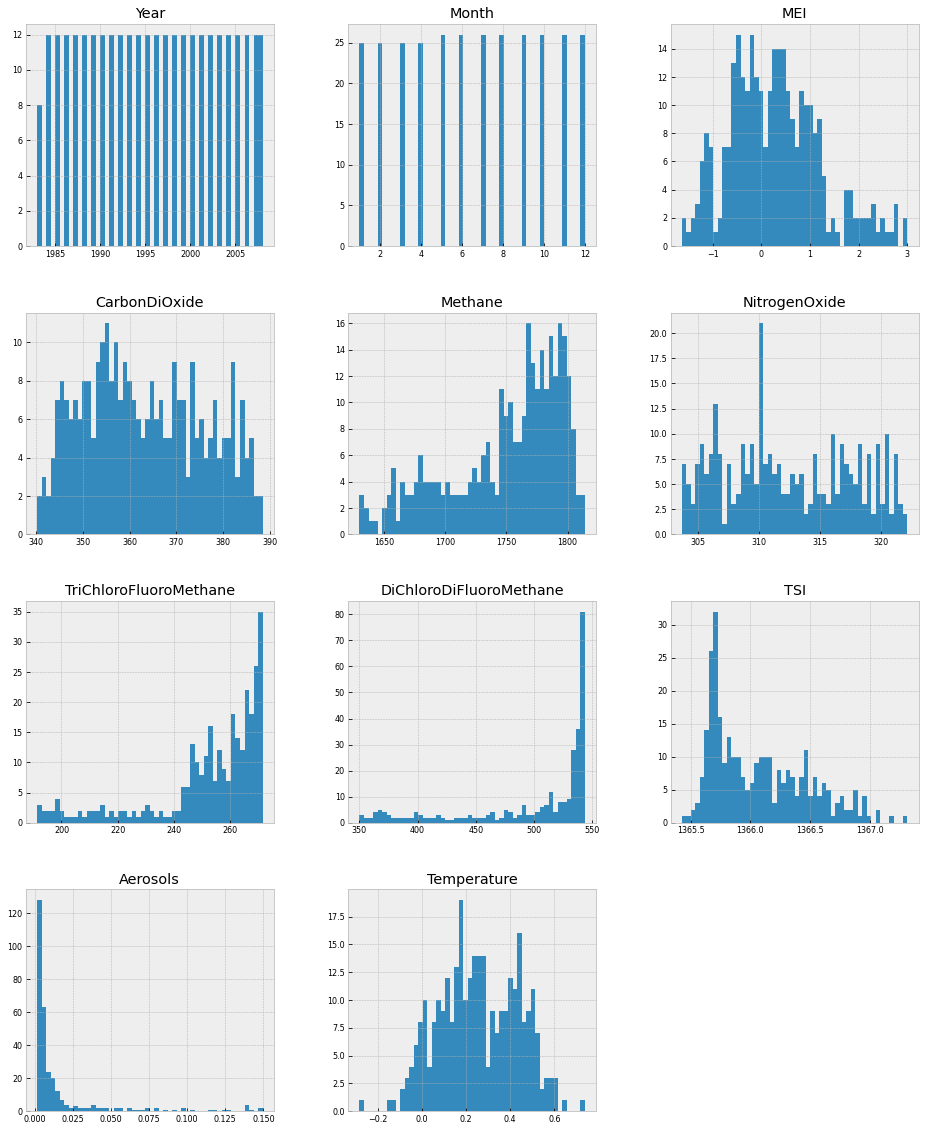

In [ ]:
tols_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## **DATA PREPROCESSING**

### **Review the DataFrame's first few rows and summarise its descriptive statistics.a**

Data Transformation and Cleaning



In [ ]:
# Displaying the first 5 Rows
tols.head()

,Year,Month,MEI,CarbonDiOxide,Methane,NitrogenOxide,TriChloroFluoroMethane,DiChloroDiFluoroMethane,TSI,Aerosols,Temperature
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
# Displaying the last 5 Rows
tols.tail()


,Year,Month,MEI,CarbonDiOxide,Methane,NitrogenOxide,TriChloroFluoroMethane,DiChloroDiFluoroMethane,TSI,Aerosols,Temperature
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [ ]:
# Displaying the Columns title
tols.columns

Index(['Year', 'Month', 'MEI', 'CarbonDiOxide', 'Methane', 'NitrogenOxide',
       'TriChloroFluoroMethane', 'DiChloroDiFluoroMethane', 'TSI', 'Aerosols',
       'Temperature'],
      dtype='object')

In [ ]:
# Checking the null value
tols.isnull().sum()


Year                       0
Month                      0
MEI                        0
CarbonDiOxide              0
Methane                    0
NitrogenOxide              0
TriChloroFluoroMethane     0
DiChloroDiFluoroMethane    0
TSI                        0
Aerosols                   0
Temperature                0
dtype: int64

In [ ]:
#Displaying the Null value and there is none according to the code above.
tols.isnull()

,Year,Month,MEI,CarbonDiOxide,Methane,NitrogenOxide,TriChloroFluoroMethane,DiChloroDiFluoroMethane,TSI,Aerosols,Temperature
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
303,False,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Displaying the information of the dataset
tols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     308 non-null    int64  
 1   Month                    308 non-null    int64  
 2   MEI                      308 non-null    float64
 3   CarbonDiOxide            308 non-null    float64
 4   Methane                  308 non-null    float64
 5   NitrogenOxide            308 non-null    float64
 6   TriChloroFluoroMethane   308 non-null    float64
 7   DiChloroDiFluoroMethane  308 non-null    float64
 8   TSI                      308 non-null    float64
 9   Aerosols                 308 non-null    float64
 10  Temperature              308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [ ]:
# Describing the shape of the data frame (Rows, Columns)
tols.shape

(308, 11)

## **Analyses of data based on statistics or computing**

In [ ]:
tols.describe()

,Year,Month,MEI,CarbonDiOxide,Methane,NitrogenOxide,TriChloroFluoroMethane,DiChloroDiFluoroMethane,TSI,Aerosols,Temperature
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


## Visually examining the relationship between each individual variable and temperature. To put it another way, Temperature is the output variable that is important in this situation, and all other variables are viewed as contributing/independent variables.. 

In [ ]:
# Extracting MEI Column as the input/independent variable (X) on x-axis
X=tols.MEI
X

0      2.556
1      2.167
2      1.741
3      1.130
4      0.428
       ...  
303   -0.266
304   -0.643
305   -0.780
306   -0.621
307   -0.666
Name: MEI, Length: 308, dtype: float64

In [ ]:
# Extracting the Temperature as the output/dependent variable y on y-axis
y=tols.Temperature
y

0      0.109
1      0.118
2      0.137
3      0.176
4      0.149
       ...  
303    0.407
304    0.378
305    0.440
306    0.394
307    0.330
Name: Temperature, Length: 308, dtype: float64

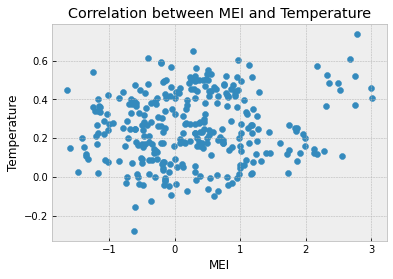

In [ ]:
# Inspecting the correllation between MEI and Temperature using a scattered plot
plt.scatter(X,y)
plt.title('Correlation between MEI and Temperature')
plt.xlabel('MEI')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting CarbonDiOxide Column as the input/independent variable (X) on x-axis
X=tols.CarbonDiOxide
X

0      345.96
1      345.52
2      344.15
3      342.25
4      340.17
        ...  
303    384.15
304    383.09
305    382.99
306    384.13
307    385.56
Name: CarbonDiOxide, Length: 308, dtype: float64

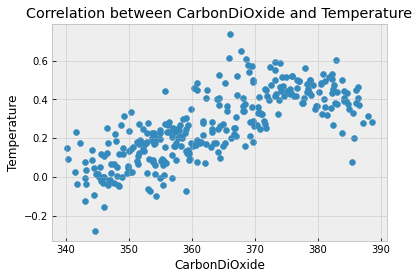

In [ ]:
# Inspecting the correllation between CarbonDiOxide and Temperature using a scattered plot
plt.scatter(X,y)
plt.title('Correlation between CarbonDiOxide and Temperature')
plt.xlabel('CarbonDiOxide')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting Methane Column as the input/independent variable (X) on x-axis
X=tols.Methane
X

0      1638.59
1      1633.71
2      1633.22
3      1631.35
4      1648.40
        ...   
303    1779.88
304    1795.08
305    1814.18
306    1812.37
307    1812.88
Name: Methane, Length: 308, dtype: float64

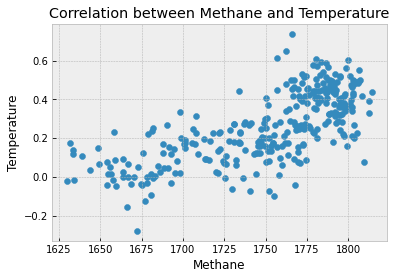

In [ ]:
# Inspecting the correllation between Methane and Temperature using a scattered plot
plt.scatter(X,y)
plt.title('Correlation between Methane and Temperature')
plt.xlabel('Methane')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting NitrogenOxide Column as the input/independent variable (X) on x-axis
X=tols.NitrogenOxide
X

0      303.677
1      303.746
2      303.795
3      303.839
4      303.901
        ...   
303    321.405
304    321.529
305    321.796
306    322.013
307    322.182
Name: NitrogenOxide, Length: 308, dtype: float64

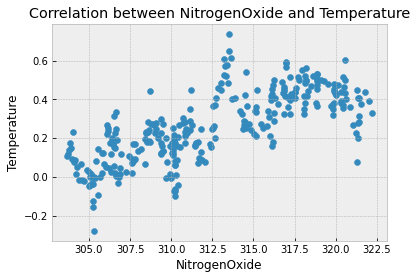

In [ ]:
# Inspecting the correllation between NitrogenOxide and Temperature using a scattered plot
plt.scatter(X,y)
plt.title('Correlation between NitrogenOxide and Temperature')
plt.xlabel('NitrogenOxide')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting TriChloroFluoroMethane Column as the input/independent variable (X) on x-axis
X=tols.TriChloroFluoroMethane
X

0      191.324
1      192.057
2      192.818
3      193.602
4      194.392
        ...   
303    244.200
304    244.083
305    244.080
306    244.225
307    244.204
Name: TriChloroFluoroMethane, Length: 308, dtype: float64

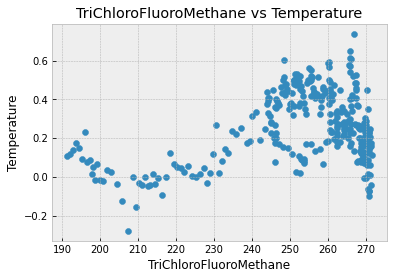

In [ ]:
plt.scatter(X,y)
plt.title('TriChloroFluoroMethane vs Temperature')
plt.xlabel('TriChloroFluoroMethane')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting DiChloroDiFluoroMethane Column as the input/independent variable (X) on x-axis
X=tols.DiChloroDiFluoroMethane
X

0      350.113
1      351.848
2      353.725
3      355.633
4      357.465
        ...   
303    535.072
304    535.048
305    534.927
306    534.906
307    535.005
Name: DiChloroDiFluoroMethane, Length: 308, dtype: float64

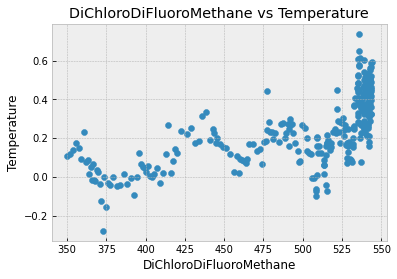

In [ ]:
plt.scatter(X,y)
plt.title('DiChloroDiFluoroMethane vs Temperature')
plt.xlabel('DiChloroDiFluoroMethane')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting TSI Column as the input/independent variable (X) on x-axis
X=tols.TSI
X

0      1366.1024
1      1366.1208
2      1366.2850
3      1366.4202
4      1366.2335
         ...    
303    1365.6570
304    1365.6647
305    1365.6759
306    1365.7065
307    1365.6926
Name: TSI, Length: 308, dtype: float64

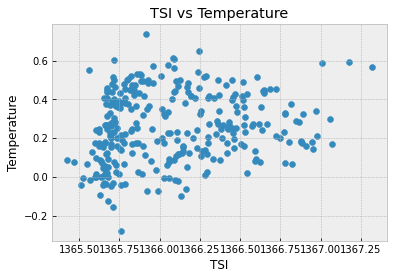

In [ ]:
plt.scatter(X,y)
plt.title('TSI vs Temperature')
plt.xlabel('TSI')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Extracting Aerosols Column as the input/independent variable (X) on x-axis
X=tols.Aerosols
X

0      0.0863
1      0.0794
2      0.0731
3      0.0673
4      0.0619
        ...  
303    0.0036
304    0.0043
305    0.0046
306    0.0048
307    0.0046
Name: Aerosols, Length: 308, dtype: float64

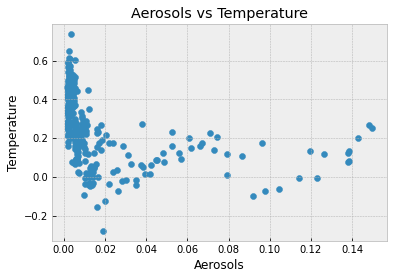

In [ ]:
plt.scatter(X,y)
plt.title('Aerosols vs Temperature')
plt.xlabel('Aerosols')
plt.ylabel('Temperature')
plt.show()

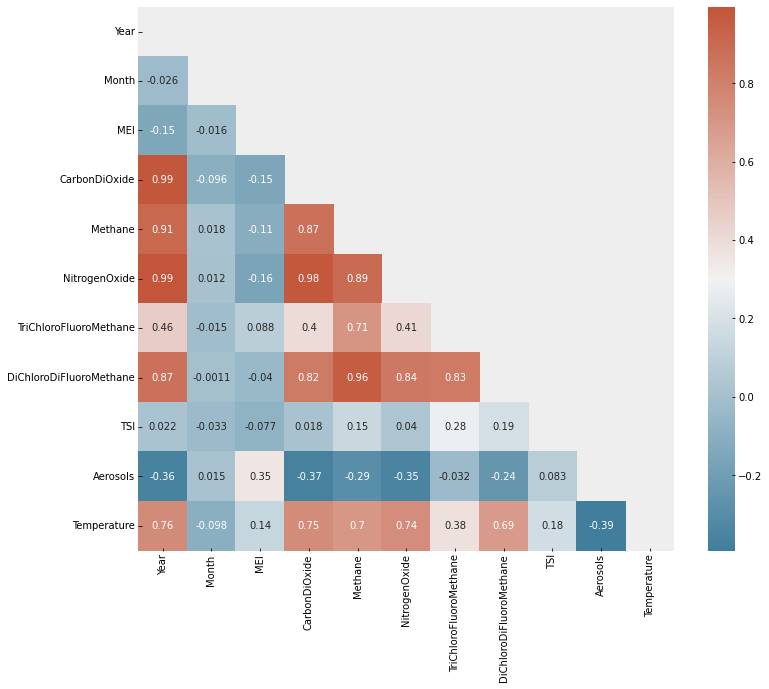

In [ ]:
corr = tols.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# We can see some relationships from the heatmap and the scattered plot. Temperature and the concentrations of Carbon Dioxide, Methane, Nitrogen Oxide, and DiChloroFlouroMethan are strongly correlated. The above questions 1 and 2 have been addressed by this. 


# **Quantitative to Quantitative Relationship** Q -> Q

Examining the quatitative features of out dataframe and how they relate to the "Temperature" which is also Quantitative.

In [ ]:
quantitative_features_list = ['CarbonDiOxide','Methane', 'NitrogenOxide', 'DiChloroDiFluoroMethane']

tols_quantitative_values = tols[quantitative_features_list]
tols_quantitative_values.head()

,CarbonDiOxide,Methane,NitrogenOxide,DiChloroDiFluoroMethane
0,345.96,1638.59,303.677,350.113
1,345.52,1633.71,303.746,351.848
2,344.15,1633.22,303.795,353.725
3,342.25,1631.35,303.839,355.633
4,340.17,1648.40,303.901,357.465


In [ ]:
features_to_analyse = [x for x in quantitative_features_list]
features_to_analyse.append('Temperature')
features_to_analyse


['CarbonDiOxide',
 'Methane',
 'NitrogenOxide',
 'DiChloroDiFluoroMethane',
 'Temperature']

Checking the Distribution

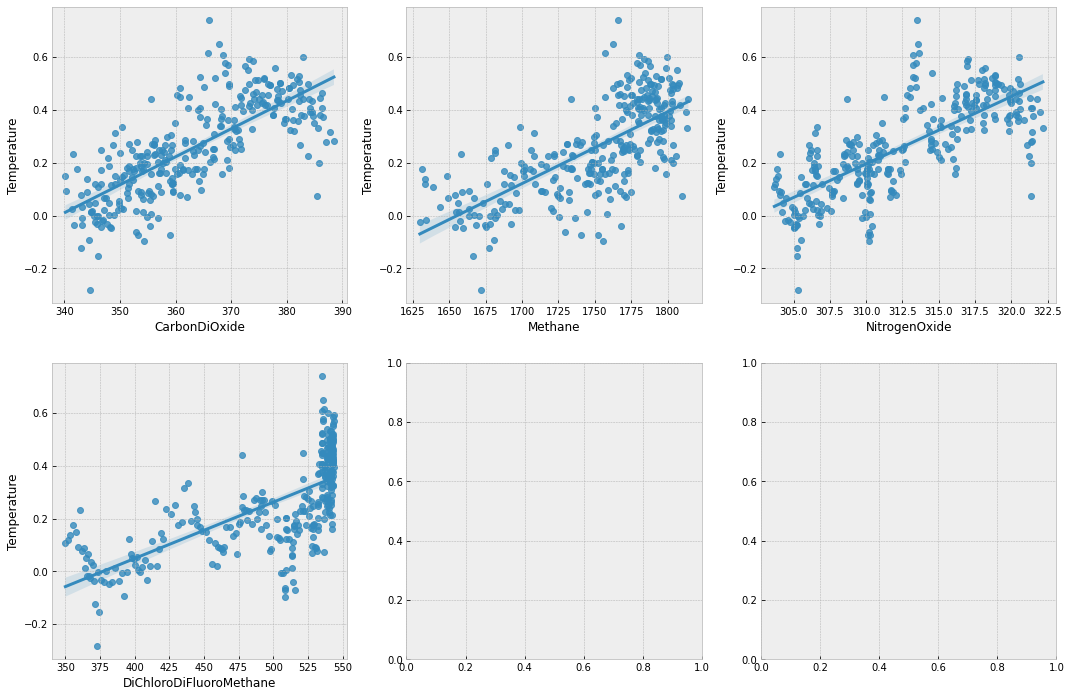

In [ ]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Temperature', data=tols[features_to_analyse], ax=ax)

Due to the Nature of the Data, lets perform Linear Regression model on each of the gases that traps heat in the atmosphere thereby increasing the global temperature. We can see how well the line fits the data, Let's calculate the model performance parameters like mean absolute error and R2-Score 

In [ ]:
tols.columns


Index(['Year', 'Month', 'MEI', 'CarbonDiOxide', 'Methane', 'NitrogenOxide',
       'TriChloroFluoroMethane', 'DiChloroDiFluoroMethane', 'TSI', 'Aerosols',
       'Temperature'],
      dtype='object')

In [ ]:
#Starting with CarbonDioxide
X=tols[['CarbonDiOxide']]
X

,CarbonDiOxide
0,345.96
1,345.52
2,344.15
3,342.25
4,340.17
...,...
303,384.15
304,383.09
305,382.99
306,384.13


In [ ]:
y=tols[['Temperature']]
y

,Temperature
0,0.109
1,0.118
2,0.137
3,0.176
4,0.149
...,...
303,0.407
304,0.378
305,0.440
306,0.394


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print(X_train);(y_train)

     CarbonDiOxide
21          346.06
263         382.20
42          345.86
15          343.20
232         370.66
..             ...
152         362.04
125         354.12
281         379.16
212         370.52
129         358.98

[231 rows x 1 columns]


,Temperature
21,-0.155
263,0.530
42,-0.033
15,0.034
232,0.413
...,...
152,0.069
125,0.061
281,0.472
212,0.329


In [ ]:
print(X_test);(y_test)

     CarbonDiOxide
300         388.50
93          355.68
115         355.53
124         354.10
49          351.61
..             ...
302         386.42
11          346.77
292         380.90
269         376.98
122         357.42

[77 rows x 1 columns]


,Temperature
300,0.283
93,0.272
115,0.007
124,0.013
49,0.121
...,...
302,0.406
11,-0.019
292,0.402
269,0.495


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[0.01053376]]
Intercept: [-3.56672463]


Text(0, 0.5, 'Temperature')

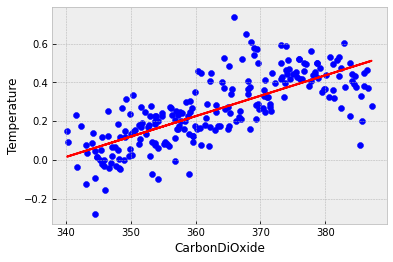

In [ ]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("CarbonDiOxide")
plt.ylabel("Temperature")

In [ ]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: 0.22


LINEAR REGRESSION FOR METHANE

In [ ]:
X=tols[['Methane']]
X

,Methane
0,1638.59
1,1633.71
2,1633.22
3,1631.35
4,1648.40
...,...
303,1779.88
304,1795.08
305,1814.18
306,1812.37


In [ ]:
y=tols[['Temperature']]
y

,Temperature
0,0.109
1,0.118
2,0.137
3,0.176
4,0.149
...,...
303,0.407
304,0.378
305,0.440
306,0.394


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train);(y_train)

     Methane
273  1786.41
100  1734.55
123  1731.93
55   1708.14
34   1672.87
..       ...
185  1787.32
203  1787.23
305  1814.18
295  1805.58
64   1701.35

[231 rows x 1 columns]


,Temperature
273,0.435
100,0.176
123,0.060
55,0.314
34,0.049
...,...
185,0.409
203,0.446
305,0.440
295,0.226


In [ ]:
print(X_test);(y_test)

     Methane
52   1681.62
208  1774.22
191  1788.27
82   1733.82
49   1687.78
..       ...
99   1721.95
149  1768.73
300  1796.43
12   1649.33
109  1743.30

[77 rows x 1 columns]


,Temperature
52,0.250
208,0.309
191,0.322
82,0.442
49,0.121
...,...
99,0.225
149,0.241
300,0.283
12,0.065


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[0.00265121]]
Intercept: [-4.38834385]


Text(0, 0.5, 'Temperature')

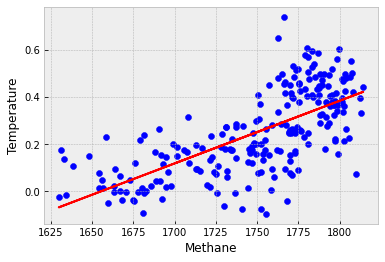

In [ ]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("Methane")
plt.ylabel("Temperature")

In [ ]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 0.10
Residual sum of squares (MSE): 0.01
R2-score: 0.11


LINEAR REGRESSION FOR NITROGEN OXIDE

In [ ]:
X=tols[['NitrogenOxide']]
X

,NitrogenOxide
0,303.677
1,303.746
2,303.795
3,303.839
4,303.901
...,...
303,321.405
304,321.529
305,321.796
306,322.013


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train);(y_train)

     NitrogenOxide
101        309.527
31         305.653
148        310.828
19         305.313
47         305.433
..             ...
238        317.403
2          303.795
249        318.188
27         305.126
300        321.420

[231 rows x 1 columns]


,Temperature
101,0.133
31,-0.002
148,0.210
19,-0.282
47,0.084
...,...
238,0.418
2,0.137
249,0.560
27,0.013


In [ ]:
print(X_test);(y_test)

     NitrogenOxide
97         308.954
282        320.321
107        309.508
106        309.690
247        318.129
..             ...
141        311.216
259        318.825
114        310.216
85         308.460
13         304.593

[77 rows x 1 columns]


,Temperature
97,0.269
282,0.440
107,0.132
106,0.199
247,0.519
...,...
141,0.449
259,0.381
114,-0.097
85,0.233


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[0.02408335]]
Intercept: [-7.26570599]


Text(0, 0.5, 'Temperature')

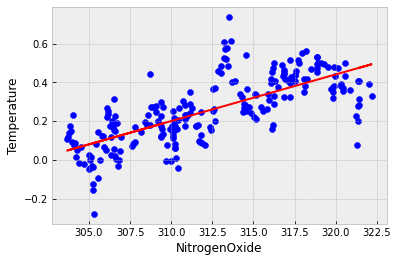

In [ ]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("NitrogenOxide")
plt.ylabel("Temperature")

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 0.19
Residual sum of squares (MSE): 0.05
R2-score: -2.34


LINEAR REGRESSION FOR DiChloroDiFluoroMethane

In [ ]:
X=tols[['DiChloroDiFluoroMethane']]
X

,DiChloroDiFluoroMethane
0,350.113
1,351.848
2,353.725
3,355.633
4,357.465
...,...
303,535.072
304,535.048
305,534.927
306,534.906


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train);(y_train)

     DiChloroDiFluoroMethane
299                  535.648
158                  528.804
113                  508.614
26                   383.905
91                   488.674
..                       ...
84                   479.174
141                  521.752
13                   367.029
132                  515.523
4                    357.465

[231 rows x 1 columns]


,Temperature
299,0.278
158,0.177
113,-0.072
26,-0.042
91,0.199
...,...
84,0.231
141,0.449
13,-0.016
132,0.218


In [ ]:
print(X_test);(y_test)

     DiChloroDiFluoroMethane
252                  542.361
115                  509.265
46                   416.063
39                   404.060
38                   402.711
..                       ...
201                  540.971
50                   422.707
266                  540.964
57                   440.937
34                   398.410

[77 rows x 1 columns]


,Temperature
252,0.323
115,0.007
46,0.021
39,-0.001
38,0.004
...,...
201,0.363
50,0.238
266,0.532
57,0.189


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[0.00228392]]
Intercept: [-0.87555367]


Text(0, 0.5, 'Temperature')

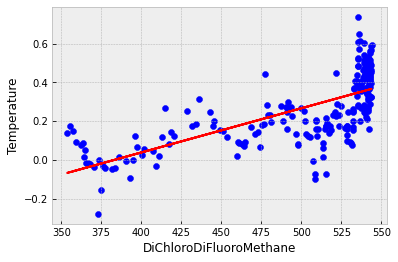

In [ ]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("DiChloroDiFluoroMethane")
plt.ylabel("Temperature")

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.05
R2-score: -2.03


## **USING MULTIPLE LINEAR REGRESSION**

We can observe that this gases are connected with the heat trapped from the aforementioned linear regression. Let's build a model. Multiple linear regression can be used to build a model that will take into account all required input variables. The Temperature remains the output variable.

In [ ]:
X= tols[['CarbonDiOxide', 'Methane', 'NitrogenOxide', 'DiChloroDiFluoroMethane']]
X

,CarbonDiOxide,Methane,NitrogenOxide,DiChloroDiFluoroMethane
0,345.96,1638.59,303.677,350.113
1,345.52,1633.71,303.746,351.848
2,344.15,1633.22,303.795,353.725
3,342.25,1631.35,303.839,355.633
4,340.17,1648.40,303.901,357.465
...,...,...,...,...
303,384.15,1779.88,321.405,535.072
304,383.09,1795.08,321.529,535.048
305,382.99,1814.18,321.796,534.927
306,384.13,1812.37,322.013,534.906


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# importing model
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)
y_prediction

array([[ 0.3796544 ],
       [ 0.26307109],
       [ 0.11475032],
       [ 0.46743212],
       [ 0.32003445],
       [ 0.24670735],
       [ 0.39581324],
       [ 0.42239269],
       [ 0.20620873],
       [ 0.43348953],
       [ 0.07582859],
       [ 0.27360152],
       [ 0.1879851 ],
       [ 0.20529996],
       [ 0.31161494],
       [ 0.27718269],
       [ 0.0494579 ],
       [ 0.2443048 ],
       [ 0.28806903],
       [ 0.17723092],
       [ 0.1945151 ],
       [ 0.349719  ],
       [ 0.28066627],
       [ 0.43803507],
       [ 0.3586716 ],
       [ 0.25038433],
       [ 0.00639765],
       [ 0.26449836],
       [ 0.30419512],
       [ 0.15208403],
       [ 0.23543944],
       [ 0.2931527 ],
       [ 0.11104332],
       [ 0.17324554],
       [ 0.31139153],
       [ 0.13762188],
       [ 0.21226592],
       [ 0.287973  ],
       [ 0.33465907],
       [ 0.19244161],
       [ 0.05686771],
       [ 0.34242961],
       [ 0.43629246],
       [ 0.22620873],
       [ 0.28889636],
       [ 0

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.04
R2-score: -2.02


## **USING ANN ALGORITHMS**

In [ ]:
df = tols[['CarbonDiOxide', 'Methane', 'NitrogenOxide', 'DiChloroDiFluoroMethane', 'Temperature']]
df

,CarbonDiOxide,Methane,NitrogenOxide,DiChloroDiFluoroMethane,Temperature
0,345.96,1638.59,303.677,350.113,0.109
1,345.52,1633.71,303.746,351.848,0.118
2,344.15,1633.22,303.795,353.725,0.137
3,342.25,1631.35,303.839,355.633,0.176
4,340.17,1648.40,303.901,357.465,0.149
...,...,...,...,...,...
303,384.15,1779.88,321.405,535.072,0.407
304,383.09,1795.08,321.529,535.048,0.378
305,382.99,1814.18,321.796,534.927,0.440
306,384.13,1812.37,322.013,534.906,0.394


In [ ]:
X = np.asarray(df[['CarbonDiOxide']])
X[0:5]

array([[345.96],
       [345.52],
       [344.15],
       [342.25],
       [340.17]])

In [ ]:
y = np.asarray(df['Temperature'])
y [0:5]

array([0.109, 0.118, 0.137, 0.176, 0.149])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (231, 1) (231,)
Test set: (77, 1) (77,)


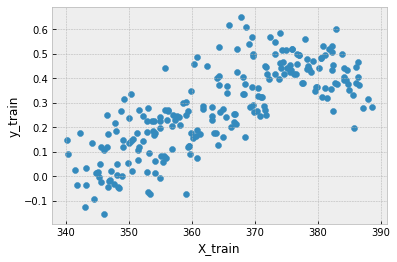

In [ ]:
plt.xlabel('X_train') 
plt.ylabel('y_train') 
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
history = model.fit(X_train,y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 3609.4331
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 992.0364
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 620.9935
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 260.8821
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 86.0424
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 31.2306
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 14.4179
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 7.0444
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 3.1763
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4737
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6526
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 13/100
8/8 [==============================]

In [ ]:
# Prediction
print('Prediction: {}'.format(model.predict([3.5])))

1/1 [==============================] - 0s 48ms/step
Prediction: [[-0.33778125]]


[array([[0.00170817]], dtype=float32), array([-0.34375983], dtype=float32)]
weight: [0.00170817] bias: [-0.34375983]


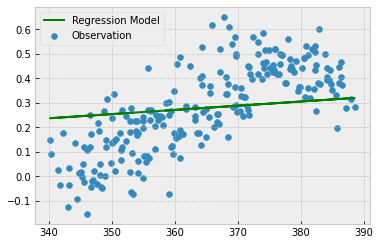

In [ ]:
# Get weight and bias
weights = model.get_weights()
print(weights)
weight = weights[0][0]
bias = weights[1]
print('weight: {} bias: {}'.format(weight, bias))
y_learned = X_train * weight + bias 
plt.scatter(X_train, y_train, label='Observation')
plt.plot(X_train, y_learned, color='green', label='Regression Model')
plt.legend() 
plt.show()

In [ ]:
from sklearn.metrics import r2_score
test_y_ = model.predict([X_test])

3/3 [==============================] - 0s 2ms/step


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 0.16
Residual sum of squares (MSE): 0.04
R2-score: -95.08


USING SCIKIT-LEARN LINEAR REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [0.01080741]
Intercept: -3.6716021610582334


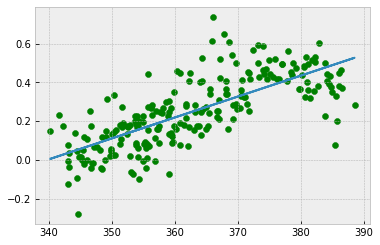

In [ ]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, X_train*regr.coef_ + regr.intercept_)

In [ ]:
from sklearn.metrics import r2_score
test_y = regr.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y,y_test))

Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: 0.42
